In [436]:
#pip install --upgrade xlrd

In [437]:
#%pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mpl_dates

import pandas as pd 
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [438]:
def read_signals(filename):
    samples_count = 5000

    c = ['name', 'x', 'y']
    for i in range(0, samples_count):
        c.append(f'v{i}')
    c = c + ['cluster', 'p0', 'p1', 'p2', 'p3']

    df = pd.read_csv(filename, names=c, dtype=np.float32)
    df = df.set_index('name', drop=True)

    return df


def write_signals(df, filename):
    df.to_csv(filename, header=False)


#if __name__ == "__main__":
    # Example
    #df = read_signals('signals.csv')
    #print(df)
    #write_signals(df, 'signals-out.csv')

Считывание и переименовывание данных

In [439]:
indata = read_signals('signals.csv')

In [440]:
dropcol = ['x','y','cluster', 'p0', 'p1', 'p2', 'p3']
hp0 = []
hp1 = []
hp2 = []
hp3 = []
#x = np.arange(5000)
x = []
y = []
for index, row in indata.iterrows():
    if row['p0'] != -1:
      hp0.append(row['v{}'.format(int(row['p0']))])        
    else:
      hp0.append(-1)
    if row['p1'] != -1:
      hp1.append(row['v{}'.format(int(row['p1']))])
    else:
      hp1.append(-1)
    if row['p2'] != -1:
      hp2.append(row['v{}'.format(int(row['p2']))])
    else:
      hp2.append(-1)
    if row['p3'] != -1:
      hp3.append(row['v{}'.format(int(row['p3']))])
    else:
      hp3.append(-1)
b = False
for index, row in indata.iterrows():
  if row['p1'] != -1:
     marker = row['p1']
     b = True
     k = 0
     for i in range(0, 5000):
       k += 1
       if k == 25:
         y.append(row['v{}'.format(i)])
         x.append(i)
         k = 0 
  if b: break
          
indata['vp0'] = hp0
indata['vp1'] = hp1
indata['vp2'] = hp2
indata['vp3'] = hp3

In [441]:
print(indata.head(2))

                 x           y     v0     v1     v2     v3     v4     v5  \
name                                                                       
168.0  3642.316895 -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307.0  4034.298096 -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   

          v6     v7  ...  v4999  cluster   p0   p1   p2   p3  vp0  vp1  vp2  \
name                 ...                                                      
168.0  0.426  0.448  ...  0.664     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
307.0  0.645  0.515  ...  0.530     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   

       vp3  
name        
168.0 -1.0  
307.0 -1.0  

[2 rows x 5011 columns]


In [442]:
traindata = indata.loc[indata['cluster'] != -1]
testdata = indata.loc[indata['cluster'] == -1]
p0data = indata.loc[indata['p0'] != -1]
#p0data = p0data.loc[p0data['p0'] != 0]
p1data = indata.loc[indata['p1'] != -1]
p2data = indata.loc[indata['p2'] != -1]
p3data = indata.loc[indata['p3'] != -1]
vp0data = indata.loc[indata['vp0'] != -1]
vp1data = indata.loc[indata['vp1'] != -1]
vp2data = indata.loc[indata['vp2'] != -1]
vp3data = indata.loc[indata['vp3'] != -1]
print(p1data)

                 x            y     v0     v1     v2     v3     v4     v5  \
name                                                                        
730.0  1011.065979  1100.473022  0.570  0.575  0.575  0.571  0.565  0.575   
419.0  4385.807129  1247.943970  0.498  0.566  0.520  0.458  0.555  0.795   
398.0   924.554993  3239.585938  0.954  0.953  0.954  0.955  0.955  0.956   
493.0  1036.838989   245.940994  0.472  0.481  0.489  0.493  0.485  0.471   
479.0  1789.344971   668.995972  0.814  0.820  0.826  0.836  0.846  0.863   
232.0  2464.802002  -252.598999  0.969  0.967  0.976  0.983  0.991  0.993   
470.0   975.838013  3863.416992  0.899  0.898  0.896  0.897  0.897  0.898   
466.0  3400.829102  1896.928955  0.728  0.735  0.740  0.745  0.750  0.755   
475.0  3774.849121    -4.787000  0.522  0.392  0.618  0.492  0.656  0.551   
11.0   3658.138916  -215.641006  0.637  0.502  0.594  0.508  0.384  0.545   
659.0  1701.222046   813.888000  0.926  0.924  0.921  0.919  0.921  0.923   

In [443]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [444]:
def getprecision(datar, key):
  dropcol = ['x','y','cluster', 'p0', 'p1', 'p2', 'p3', 'vp0', 'vp1', 'vp2', 'vp3']
  X = datar.drop(dropcol, axis=1)
  Y = datar[key].values
  scaler = StandardScaler()
  scaler.fit(X)
  #X = scaler.transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)
  print(X_train.shape)
  print(y_train.shape)
  print(X_test.shape)
  print(y_test.shape)
  print(y_test)



  from sklearn.model_selection import RandomizedSearchCV
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
  #print(random_grid)

  # Use the random grid to search for best hyperparameters
  # First create the base model to tune
  rf = RandomForestClassifier()
  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  # Fit the random search model
  #rf_random.fit(X_train, y_train)
  #best_random = rf_random.best_estimator_
  #rf_random.best_params_
  #print(best_random)
  #print(rf_random.best_params_)

  settings = {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}







  clf = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=600)
  clf.fit(X_train, y_train)
  

         

  y_pred = clf.predict(X_test)
  print("____________ForestC __________")
  print("Test:")
  print(y_test)
  print("Predicted values:")
  print(y_pred)
  errors = abs(y_pred - y_test)
  mape = 100 * np.mean(errors / y_test)
  accuracy = 100 - mape
  print('Model Performance')
  print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
  print('Accuracy = {:0.2f}%.'.format(accuracy))

  return clf    

dropcol = ['x','y','cluster', 'p0', 'p1', 'p2', 'p3', 'vp0', 'vp1', 'vp2', 'vp3']

model = getprecision(p0data, 'p0')
indata['pred0'] = model.predict(indata.drop(dropcol, axis=1))
dropcol.append('pred0')

model = getprecision(p1data, 'p1')
indata['pred1'] = model.predict(indata.drop(dropcol, axis=1))
dropcol.append('pred1')

model = getprecision(p2data, 'p2')
indata['pred2'] = model.predict(indata.drop(dropcol, axis=1))
dropcol.append('pred2')

model = getprecision(p3data, 'p3')
indata['pred3'] = model.predict(indata.drop(dropcol, axis=1))
dropcol.append('pred3')

(36, 5000)
(36,)
(5, 5000)
(5,)
[2263.  806.    0.    0.  394.]
____________ForestC __________
Test:
[2263.  806.    0.    0.  394.]
Predicted values:
[  0. 662.   0.   0. 662.]
Model Performance
Average Error: 535.0000 degrees.
Accuracy = nan%.
(35, 5000)
(35,)
(4, 5000)
(4,)
[2323. 3716. 3700. 2989.]
____________ForestC __________
Test:
[2323. 3716. 3700. 2989.]
Predicted values:
[2414. 3120. 1358. 3028.]
Model Performance
Average Error: 767.0000 degrees.
Accuracy = 78.86%.
(34, 5000)
(34,)
(4, 5000)
(4,)
[3473. 4123. 3737. 4346.]
____________ForestC __________
Test:
[3473. 4123. 3737. 4346.]
Predicted values:
[4070. 3758. 3673. 4286.]
Model Performance
Average Error: 271.5000 degrees.
Accuracy = 92.72%.
(36, 5000)
(36,)
(4, 5000)
(4,)
[4584. 4999. 4221. 3297.]
____________ForestC __________
Test:
[4584. 4999. 4221. 3297.]
Predicted values:
[4999. 4999. 3517. 3521.]
Model Performance
Average Error: 335.7500 degrees.
Accuracy = 91.87%.


In [445]:
indata = indata.drop(['vp0', 'vp1', 'vp2', 'vp3'], axis=1)

In [446]:
indata.head(15)

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4999,cluster,p0,p1,p2,p3,pred0,pred1,pred2,pred3
name,,,,,,,,,,,,,,,,,,,,,
168.0,3642.316895,-107.175003,0.558,0.595,0.519,0.742,0.664,0.467,0.426,0.448,...,0.664,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2240.0,2544.0,4999.0
307.0,4034.298096,-668.197998,0.650,0.457,0.572,0.644,0.581,0.525,0.645,0.515,...,0.530,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2332.0,2628.0,4999.0
668.0,4358.000977,1703.198975,0.638,0.621,0.646,0.495,0.510,0.611,0.574,0.601,...,0.519,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2414.0,2622.0,4999.0
229.0,2786.060059,75.125000,0.917,0.917,0.916,0.912,0.908,0.905,0.904,0.904,...,0.943,-1.0,-1.0,-1.0,-1.0,-1.0,450.0,3452.0,4201.0,4523.0
316.0,988.637024,-492.056000,0.359,0.364,0.379,0.396,0.404,0.405,0.392,0.371,...,0.727,-1.0,-1.0,-1.0,-1.0,-1.0,1200.0,1734.0,3607.0,4507.0
711.0,4382.296875,99.473000,0.468,0.525,0.529,0.503,0.642,0.538,0.515,0.606,...,0.504,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2414.0,2628.0,4999.0
324.0,3969.194092,2076.099121,0.545,0.569,0.514,0.619,0.575,0.551,0.565,0.638,...,0.731,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2264.0,2628.0,4999.0
97.0,3526.093018,-54.159000,0.601,0.482,0.543,0.533,0.621,0.662,0.499,0.505,...,0.423,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2240.0,2548.0,4999.0
730.0,1011.065979,1100.473022,0.570,0.575,0.575,0.571,0.565,0.575,0.579,0.574,...,0.799,6.0,-1.0,1750.0,-1.0,-1.0,0.0,1750.0,3033.0,4507.0


In [447]:
indata.tail(15)

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4999,cluster,p0,p1,p2,p3,pred0,pred1,pred2,pred3
name,,,,,,,,,,,,,,,,,,,,,
557.0,1379.959961,1532.691040,0.583,0.591,0.602,0.614,0.627,0.637,0.647,0.656,...,0.993,-1.0,-1.0,-1.0,-1.0,-1.0,662.0,242.0,3629.0,4572.0
340.0,3005.560059,1966.109985,0.134,0.141,0.145,0.148,0.152,0.153,0.152,0.147,...,0.983,-1.0,-1.0,-1.0,-1.0,-1.0,662.0,3120.0,4230.0,3414.0
632.0,1080.095947,38.965000,0.556,0.552,0.553,0.557,0.561,0.555,0.551,0.551,...,0.935,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1750.0,3033.0,4022.0
220.0,3383.717041,-1597.626953,0.633,0.573,0.532,0.607,0.638,0.503,0.533,0.468,...,0.366,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2561.0,2731.0,4999.0
550.0,1183.859009,1250.806030,0.692,0.705,0.713,0.716,0.718,0.720,0.721,0.722,...,0.984,-1.0,-1.0,-1.0,-1.0,-1.0,662.0,596.0,4158.0,3741.0
172.0,3078.574951,3446.112061,0.748,0.753,0.754,0.755,0.754,0.754,0.755,0.755,...,0.953,-1.0,-1.0,-1.0,-1.0,-1.0,450.0,242.0,3776.0,3741.0
272.0,3714.319092,1949.359985,0.483,0.503,0.522,0.541,0.556,0.570,0.582,0.591,...,0.988,-1.0,-1.0,-1.0,-1.0,-1.0,662.0,1076.0,4230.0,3414.0
49.0,287.321991,1511.628052,0.910,0.921,0.925,0.926,0.926,0.927,0.927,0.927,...,0.906,-1.0,-1.0,-1.0,-1.0,-1.0,1989.0,3028.0,3607.0,4999.0
422.0,3020.048096,-80.146004,0.838,0.855,0.872,0.885,0.895,0.904,0.909,0.915,...,0.958,-1.0,-1.0,-1.0,-1.0,-1.0,450.0,3452.0,4201.0,4523.0


In [448]:
hp0 = []
hp1 = []
hp2 = []
hp3 = []

for index, row in indata.iterrows():
    if row['pred0'] != -1:
      hp0.append(row['v{}'.format(int(row['pred0']))])        
    else:
      hp0.append(-1)
    if row['pred1'] != -1:
      hp1.append(row['v{}'.format(int(row['pred1']))])
    else:
      hp1.append(-1)
    if row['pred2'] != -1:
      hp2.append(row['v{}'.format(int(row['pred2']))])
    else:
      hp2.append(-1)
    if row['pred3'] != -1:
      hp3.append(row['v{}'.format(int(row['pred3']))])
    else:
      hp3.append(-1)




In [449]:
new = indata[['x', 'y', 'pred0', 'pred1', 'pred2', 'pred3', 'cluster']].copy()

c=[]
for i in range(0, 5000):
        c.append(f'v{i}')

new['min'] = indata[c].min(axis=1)
new['max'] = indata[c].max(axis=1)
new['mean'] = indata[c].mean(axis=1)
new['std'] = indata[c].std(axis=1)
new['pv0'] = hp0
new['pv1'] = hp1
new['pv2'] = hp2
new['pv3'] = hp3


traindata = new.loc[indata['cluster'] != -1]
testdata = new.loc[indata['cluster'] == -1]

In [450]:
traindata = traindata.reindex(columns=['x',	'y', 'pred0',	'pred1',	'pred2',	'pred3', 'min',	'max',	'mean',	'std',	'pv0',	'pv1',	'pv2',	'pv3', 'cluster'])
traindata.head(5)

,x,y,pred0,pred1,pred2,pred3,min,max,mean,std,pv0,pv1,pv2,pv3,cluster
name,,,,,,,,,,,,,,,
730.0,1011.065979,1100.473022,0.0,1750.0,3033.0,4507.0,0.386,1.0,0.639802,0.129362,0.570,0.653,0.901,0.581,6.0
673.0,2520.621094,-1655.088989,0.0,2427.0,2731.0,4999.0,0.091,1.0,0.599210,0.117609,0.662,0.699,0.739,0.408,8.0
520.0,2251.706055,3314.560059,2222.0,2452.0,2628.0,4999.0,0.299,1.0,0.603290,0.170240,0.475,0.647,0.483,0.998,5.0
609.0,3748.843018,730.304993,1528.0,3869.0,4358.0,3741.0,0.070,1.0,0.820845,0.155269,0.805,0.976,0.909,0.970,1.0
419.0,4385.807129,1247.943970,0.0,2414.0,2495.0,4999.0,0.088,1.0,0.557892,0.155637,0.498,0.620,0.573,0.584,7.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

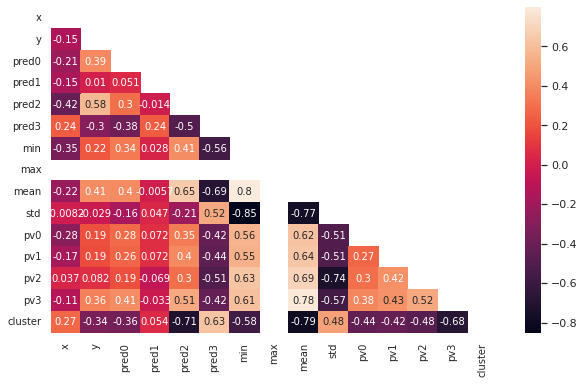

In [451]:
mask = np.zeros_like(traindata.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]= True
from numpy.ma.core import mask_or
plt.figure(figsize=(10,6))
sns.heatmap(traindata.corr(), annot=True, annot_kws={'size':10}, mask=mask)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [496]:
dropcol = ['x',	'y',	'pred0',	'pred1',	'pred2',	'pred3',	'max', 'cluster']
X = traindata.drop(dropcol, axis=1)
Y = traindata['cluster'].values
print(X)
print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test)

         min      mean       std    pv0    pv1    pv2    pv3
name                                                        
730.0  0.386  0.639802  0.129362  0.570  0.653  0.901  0.581
673.0  0.091  0.599210  0.117609  0.662  0.699  0.739  0.408
520.0  0.299  0.603290  0.170240  0.475  0.647  0.483  0.998
609.0  0.070  0.820845  0.155269  0.805  0.976  0.909  0.970
419.0  0.088  0.557892  0.155637  0.498  0.620  0.573  0.584
...      ...       ...       ...    ...    ...    ...    ...
70.0   0.289  0.844803  0.107406  0.296  0.893  0.823  0.892
665.0  0.020  0.543032  0.222813  0.581  0.712  0.671  0.246
471.0  0.280  0.889319  0.145164  0.880  0.763  0.882  0.881
505.0  0.877  0.954243  0.022136  0.946  0.964  0.970  0.877
273.0  0.109  0.586284  0.150669  0.474  0.592  0.615  0.468

[109 rows x 7 columns]
[6. 8. 5. 1. 7. 5. 6. 7. 0. 3. 3. 1. 4. 5. 2. 3. 5. 3. 7. 7. 7. 0. 0. 8.
 7. 3. 8. 8. 4. 5. 0. 4. 0. 4. 5. 0. 5. 8. 5. 1. 3. 8. 0. 5. 7. 6. 0. 0.
 7. 4. 6. 8. 5. 0. 7. 1. 7. 7. 6. 7. 

In [497]:
clf1 = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=4, n_estimators=2000)
clf1.fit(X_train, y_train)




         

y_pred = clf1.predict(X_test)
print("____________ForestC __________")
print("Test:")
print(y_test)
print("Predicted values:")
print(y_pred)
errors = abs(y_pred - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))



____________ForestC __________
Test:
[2. 5. 0. 5. 6. 0. 7. 6. 4. 0. 0. 1. 5. 8. 3. 7. 0. 5. 0. 8. 5. 6.]
Predicted values:
[0. 5. 0. 6. 6. 0. 7. 6. 3. 0. 0. 3. 6. 8. 3. 7. 6. 5. 3. 8. 5. 6.]
[[4 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 3 2 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73         6
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.25      1.00      0.40         1
         4.0       0.00      0.00      0.00         1
         5.0       1.00      0.60      0.75         5
         6.0       0.50      1.00      0.67         3
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2

    accuracy                           0.68        22
   macro avg       0.51

In [498]:
new['pcluster'] = clf1.predict(new.drop(dropcol, axis=1))
print(new.head())

                 x            y   pred0   pred1   pred2   pred3  cluster  \
name                                                                       
168.0  3642.316895  -107.175003     0.0  2240.0  2544.0  4999.0     -1.0   
307.0  4034.298096  -668.197998     0.0  2332.0  2628.0  4999.0     -1.0   
668.0  4358.000977  1703.198975     0.0  2414.0  2622.0  4999.0     -1.0   
229.0  2786.060059    75.125000   450.0  3452.0  4201.0  4523.0     -1.0   
316.0   988.637024  -492.056000  1200.0  1734.0  3607.0  4507.0     -1.0   

         min  max      mean       std    pv0    pv1    pv2    pv3  pcluster  
name                                                                         
168.0  0.114  1.0  0.570214  0.141247  0.558  0.592  0.656  0.664       7.0  
307.0  0.132  1.0  0.578640  0.146995  0.650  0.565  0.560  0.530       7.0  
668.0  0.097  1.0  0.593949  0.136100  0.638  0.669  0.542  0.519       8.0  
229.0  0.321  1.0  0.924031  0.098710  0.890  0.965  0.908  0.934       2.0  

In [503]:
dropcol = ['pred0',	'pred1',	'pred2',	'pred3']
outdata = indata.copy()

outdata['p0'] = outdata['pred0']
outdata['p1'] = outdata['pred1']
outdata['p2'] = outdata['pred2']
outdata['p3'] = outdata['pred3']
outdata['cluster'] = new['pcluster']
outdata = outdata.drop(dropcol, axis=1)

In [505]:
print(outdata.head())
write_signals(outdata, 'signals-out.csv')

                 x            y     v0     v1     v2     v3     v4     v5  \
name                                                                        
168.0  3642.316895  -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307.0  4034.298096  -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   
668.0  4358.000977  1703.198975  0.638  0.621  0.646  0.495  0.510  0.611   
229.0  2786.060059    75.125000  0.917  0.917  0.916  0.912  0.908  0.905   
316.0   988.637024  -492.056000  0.359  0.364  0.379  0.396  0.404  0.405   

          v6     v7  ...  v4995  v4996  v4997  v4998  v4999  cluster      p0  \
name                 ...                                                       
168.0  0.426  0.448  ...  0.606  0.523  0.607  0.629  0.664      7.0     0.0   
307.0  0.645  0.515  ...  0.397  0.579  0.636  0.570  0.530      7.0     0.0   
668.0  0.574  0.601  ...  0.569  0.587  0.541  0.412  0.519      8.0     0.0   
229.0  0.904  0.904  ...  0.943  0.943  0.943  0.943  0.943 